In [25]:
# Try to import the ONNX model from the previous section
import onnx

# Load the ONNX model
model = onnx.load("model_mnist.onnx")

# Check that the model is well formed
onnx.checker.check_model(model)

print(onnx.helper.printable_graph(model.graph))

graph main_graph (
  %input[FLOAT, 1x28x28]
) initializers (
  %layer1.bias[FLOAT, 100]
  %layer2.bias[FLOAT, 100]
  %layer_out.bias[FLOAT, 10]
  %onnx::MatMul_22[FLOAT, 784x100]
  %onnx::MatMul_23[FLOAT, 100x100]
  %onnx::MatMul_24[FLOAT, 100x10]
) {
  %/flatten/Flatten_output_0 = Flatten[axis = 1](%input)
  %/Constant_output_0 = Constant[value = <Scalar Tensor []>]()
  %/Gather_output_0 = Gather[axis = 0](%/flatten/Flatten_output_0, %/Constant_output_0)
  %/layer1/MatMul_output_0 = MatMul(%/Gather_output_0, %onnx::MatMul_22)
  %/layer1/Add_output_0 = Add(%layer1.bias, %/layer1/MatMul_output_0)
  %/activation_fn1/Sigmoid_output_0 = Sigmoid(%/layer1/Add_output_0)
  %/layer2/MatMul_output_0 = MatMul(%/activation_fn1/Sigmoid_output_0, %onnx::MatMul_23)
  %/layer2/Add_output_0 = Add(%layer2.bias, %/layer2/MatMul_output_0)
  %/activation_fn2/Sigmoid_output_0 = Sigmoid(%/layer2/Add_output_0)
  %/layer_out/MatMul_output_0 = MatMul(%/activation_fn2/Sigmoid_output_0, %onnx::MatMul_24)
  %/laye

[array([9.4346695e-02, 2.2324764e-05, 1.6347086e-01, 6.2449867e-01,
       7.8253997e-06, 8.4286317e-02, 2.2796572e-04, 4.5060870e-04,
       3.2457624e-02, 2.3119885e-04], dtype=float32)]
img/0.jpg , predicted number= 0
img/1.jpg , predicted number= 1
img/2.jpg , predicted number= 8
img/3.jpg , predicted number= 3
img/4.jpg , predicted number= 4
img/5.jpg , predicted number= 0
img/6.jpg , predicted number= 6
img/7.jpg , predicted number= 7
img/8.jpg , predicted number= 8
img/9.jpg , predicted number= 7


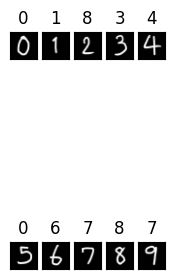

In [26]:
# Run model with onnx runtime
import numpy as np
import matplotlib.pyplot as plt
import cv2
import onnxruntime

# Load the ONNX model
session = onnxruntime.InferenceSession('model_mnist.onnx')


random_array_2d = np.random.rand(1, 28, 28).astype(np.float32)
print(output)

# Test with your own handwritten images.
fig=plt.figure(figsize=(2, 5))
for i in range(1, 11):
    # Load image, Resize to 28x28, Invert and Normalize the pixel values
    path = 'img/' + str(i-1) + '.jpg'
    img_original = cv2.imread(path)
    img = cv2.resize(img_original, (28, 28), interpolation=cv2.INTER_AREA)
    img = cv2.bitwise_not(img)
    img = img / 256
    ax = fig.add_subplot(2, 5, i)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(img)
    
    # Convert numpy image into tensor image
    # Select only 1 channel of RGB images is enough.
    # Add dimension to image to have the same format as MNIST data which has 4 dimensions with unsqueeze()
    img = img[:,:,0].astype(np.float32)
    data_input = np.expand_dims(img, axis=0)
    
    # Prediction
    predict = session.run(None, {'input': data_input})
    indices_predict = np.argmax(predict)
    print(path, ", predicted number=", int(indices_predict))
    plt.title(str(int(indices_predict)))